In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import zipfile
import os
import sys

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

**1. TESS DATASET**

In [5]:
Tess = r"C:\Users\rahul\OneDrive\Desktop\Project\New folder1"

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    dir_path = os.path.join(Tess, dir)
    directories = os.listdir(dir_path)
    
    for file in directories:
        if file.endswith('.wav'):
            part = file.split('.')[0]
            parts = part.split('_')
            # print(f"Processing file: {file} | Parts: {parts}") 
            if len(parts) > 2:
                emotion_code = parts[2]
                if emotion_code == 'ps':
                    file_emotion.append('surprise')
                else:
                    file_emotion.append(emotion_code)
            else:
                print(f"File {file} doesn't have enough parts to extract emotion.")
            
            file_path.append(os.path.join(dir_path, file))

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
1    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
2    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
3    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
4    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...

**2. RAVDESS DATAFRAME**

In [6]:
Ravdess_zip_path = Path(r"C:\Users\rahul\OneDrive\Desktop\Project\archive2.zip")

extracted_dir = Path(r"C:\Users\rahul\OneDrive\Desktop\Project\extracted_ravdess")

if not extracted_dir.exists():
    with zipfile.ZipFile(Ravdess_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

ravdess_directory_list = os.listdir(extracted_dir)

file_emotion = []
file_path = []

emotion_mapping = {
    1: 'neutral', 
    2: 'neutral',
    3: 'happy', 
    4: 'sad', 
    5: 'angry', 
    6: 'fear', 
    7: 'disgust', 
    8: 'surprise'
}

for dir in ravdess_directory_list:
    actor_dir = os.path.join(extracted_dir, dir)
    actor_files = os.listdir(actor_dir)
    
    for file in actor_files:
        if file.endswith('.wav'):
            part = file.split('.')[0].split('-')
            
            emotion_code = int(part[2]) 
            
            file_emotion.append(emotion_mapping.get(emotion_code, 'Unknown'))
            file_path.append(os.path.join(actor_dir, file))

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
1  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
2  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
3  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
4  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...

**3. CREMA DATAFRAME**

In [7]:
Crema = (r"C:\Users\rahul\OneDrive\Desktop\Project\New folder3")

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
1  disgust  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
2     fear  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
3    happy  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
4  neutral  C:\Users\rahul\OneDrive\Desktop\Project\New fo...

**4. CREMA-D DATASET**

In [8]:

Savee = r"C:\Users\rahul\OneDrive\Desktop\Project\New folder"

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()


Emotions                                               Path
0    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
1    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
2    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
3    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...
4    angry  C:\Users\rahul\OneDrive\Desktop\Project\New fo...

In [9]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
1  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
2  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
3  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
4  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...

# Data Visualisation and Exploration

In [10]:
emotion_names = data_path.Emotions.unique()
print(emotion_names)

['neutral' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [11]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio

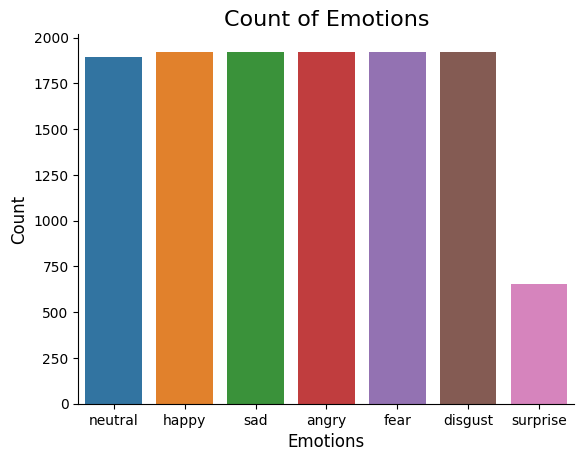

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_palette = {
    'neutral': '#1f77b4',  # Blue
    'happy': '#ff7f0e',    # Orange
    'sad': '#2ca02c',      # Green
    'angry': '#d62728',    # Red
    'fear': '#9467bd',     # Purple
    'disgust': '#8c564b',  # Brown
    'surprise': '#e377c2'   # Pink
}

plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path, palette=emotion_palette)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

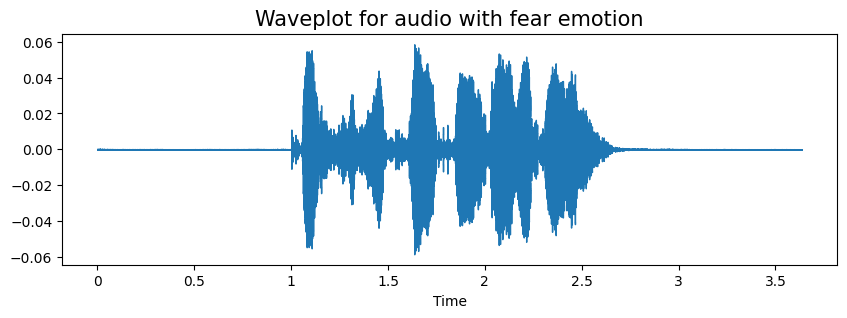

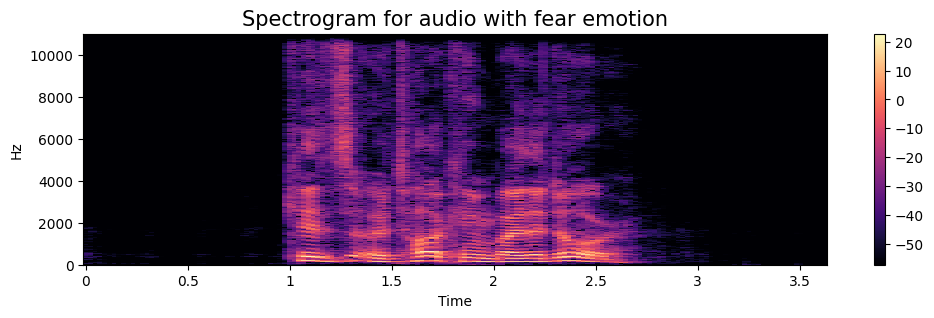

In [14]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

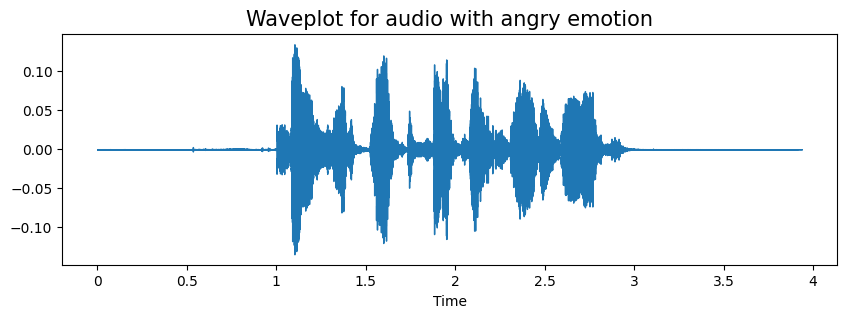

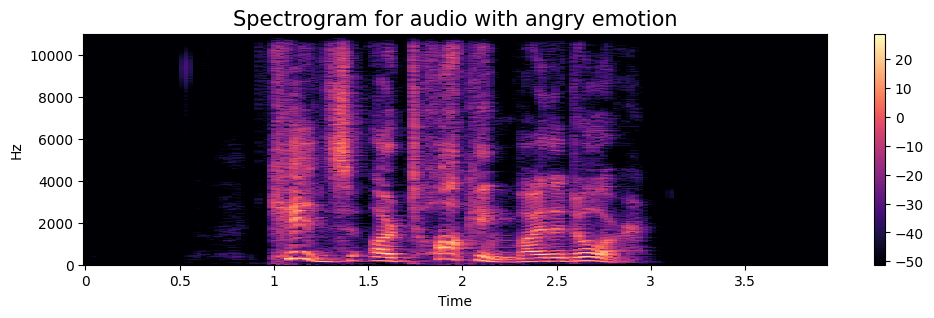

In [15]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

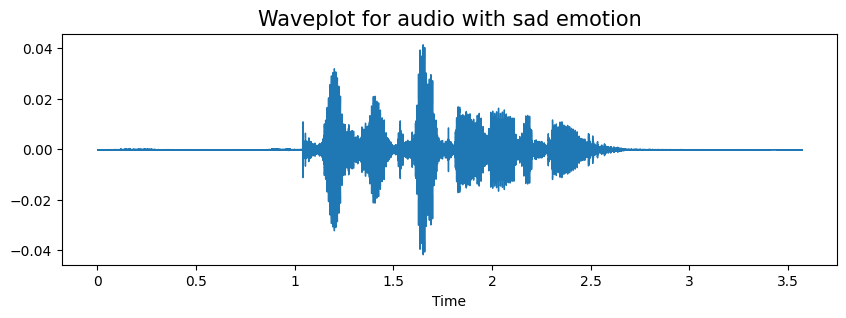

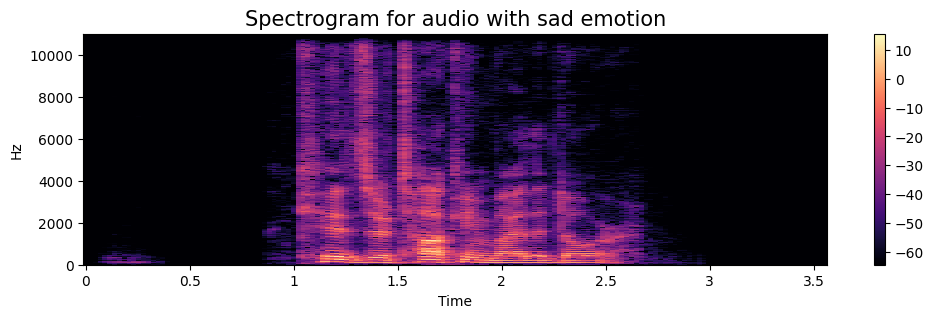

In [16]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

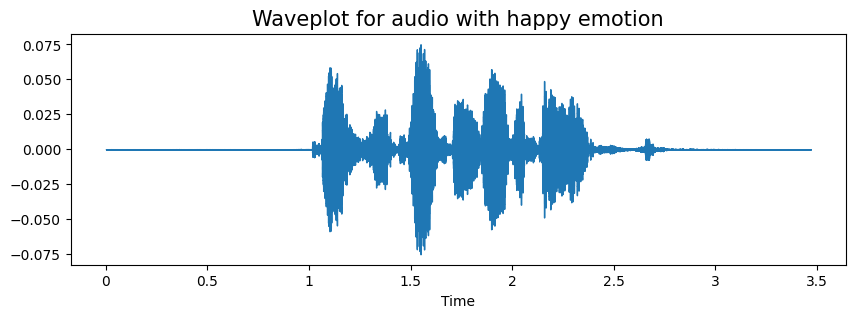

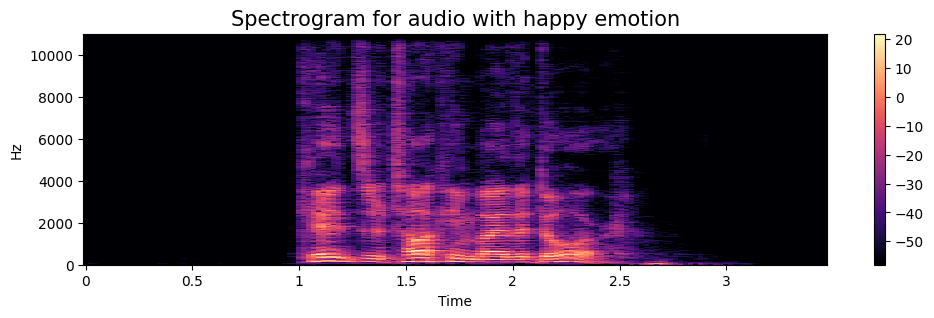

In [17]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [18]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [19]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)
sample_rate

22050

**Simple Audio**

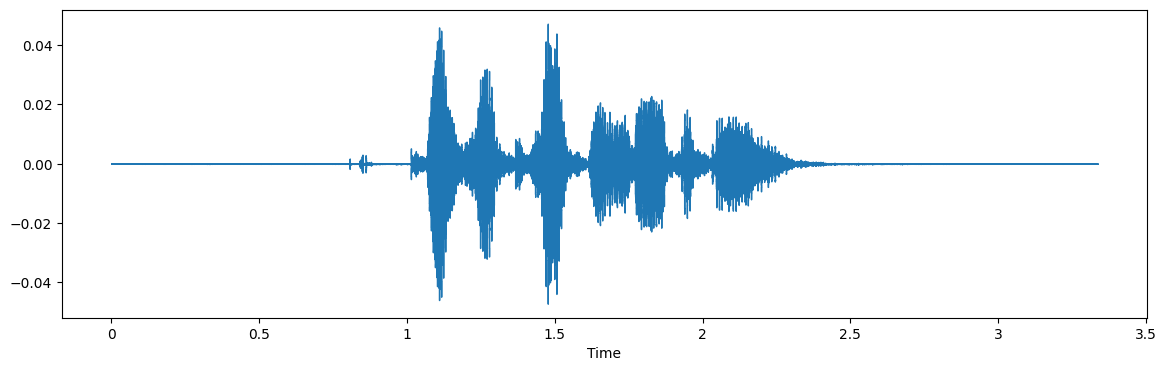

In [20]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

**Noise injection**

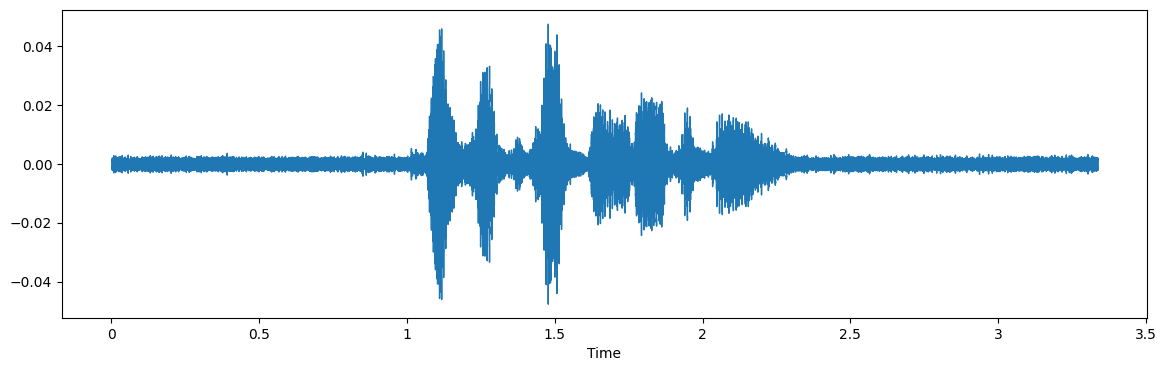

In [21]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Stretching**

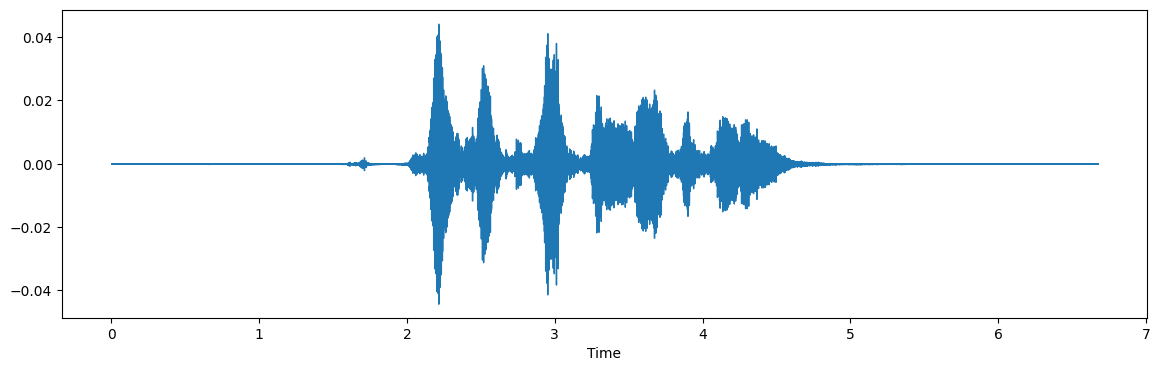

In [22]:
x = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Shifting**

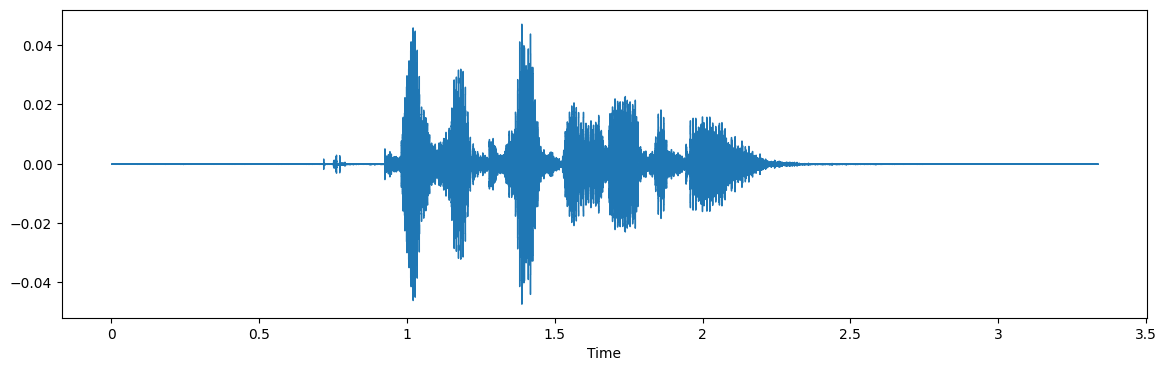

In [23]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Pitch**

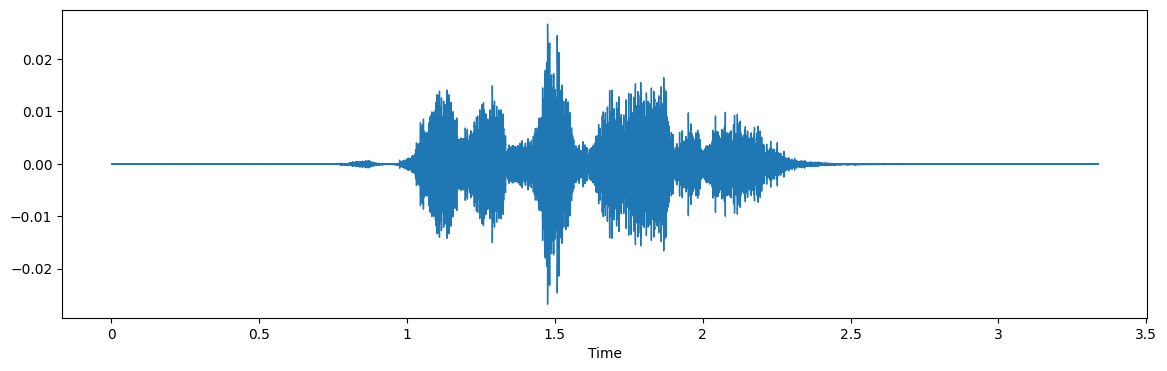

In [24]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**From the above types of augmentation techniques we are using noise, stretching(ie. changing speed) and some pitching.**

# Feature Extraction

In [25]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [26]:
path = np.array(data_path["Path"])[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

54458

In [27]:
print("ZCR: ", zcr(data).shape)
print("RMS :", rmse(data).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (107,)
RMS : (107,)
MFCC:  (2140,)


In [28]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [29]:
def get_features(path, duration=2.5, offset=0.6):
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) 

    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) 

    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) 

    return result

In [30]:
data_path.head()

Emotions                                               Path
0  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
1  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
2  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
3  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...
4  neutral  C:\Users\rahul\OneDrive\Desktop\Project\extrac...

In [33]:
X, Y = [], []
print("Feature processing...")

for ind, (path, emotion) in enumerate(zip(data_path.Path, data_path.Emotions)):
    # print(f"Processing file: {path}")  
    if os.path.exists(path): 
        features = get_features(path)  
        if ind % 4000 == 0:
            print(f"{ind} samples have been processed...")
        
        X.extend(features)
        Y.extend([emotion] * len(features)) 
    # else:
    #     # print(f"File not found: {path}")

print(f"{data_path.Path.shape[0]} samples have been processed...")
print("Done.")

Feature processing...
0 samples have been processed...
12000 samples have been processed...
12162 samples have been processed...
Done.


In [32]:
len(X), len(Y), data_path.Path.shape

(18880, 18880, (12162,))

In [33]:
df = pd.DataFrame(X)
df['Emotions'] = Y
df.to_csv('features.csv', index=False)
df.head()

0         1         2         3         4         5         6  \
0  0.173828  0.264648  0.372559  0.486328  0.625488  0.681152  0.720703   
1  0.244629  0.359375  0.478516  0.473145  0.469238  0.479492  0.480469   
2  0.263672  0.355469  0.461914  0.403320  0.355957  0.348145  0.336426   
3  0.238770  0.361816  0.496582  0.512695  0.520020  0.529297  0.525879   
4  0.247070  0.389648  0.564941  0.642578  0.665527  0.684570  0.676270   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.651855  0.562988  0.559082  ...  0.766315  0.755441  0.743671  0.731043   
1  0.490723  0.505371  0.507324  ...  6.348288 -1.362806 -2.558989 -0.382129   
2  0.404785  0.479980  0.539062  ...  0.457234  0.449712  0.441576  0.432843   
3  0.525391  0.523438  0.518066  ...  1.851635  0.690199  2.131600  2.188240   
4  0.666992  0.648926  0.595703  ...  0.000000  0.000000  0.000000  0.000000   

       2371      2372      2373      2374      2375  Emotions  
0  0.717561  0.703260  0.688124  0.672208  0.655518   neutral  
1  0.741179 -0.448139 -2.797617 -4.969617 -0.452589   neutral  
2  0.423526  0.413629  0.403180  0.392180  0.380650   neutral  
3 -3.669360  5.001381  8.147189  1.561216 -3.482562   neutral  
4  0.000000  0.000000  0.000000  0.000000  0.000000   neutral  

[5 rows x 2377 columns]

In [34]:
print(df.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [35]:
df = df.fillna(0)
print(df.isna().any())
df.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(18880, 2377)

Data Preparation

In [36]:
X=df.drop(labels='Emotions',axis=1)
Y=df['Emotions']

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
import tensorflow
from keras import utils, models, layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [38]:
lb=LabelEncoder()
Y=utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [39]:
# splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((15104, 2376), (15104, 7), (3776, 2376), (3776, 7))

In [40]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, Y_train.shape,Y_test.shape,Y_val.shape

((13593, 2376), (3776, 2376), (1511, 2376), (13593, 7), (3776, 7), (1511, 7))

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape

((13593, 2376), (3776, 2376), (1511, 2376), (13593, 7), (3776, 7), (1511, 7))

In [42]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_train.shape, X_test.shape, X_val.shape

((13593, 2376, 1), (3776, 2376, 1), (1511, 2376, 1))

Make the Model

In [43]:
earlystopping = EarlyStopping(monitor="val_acc",
                              mode='max', 
                              patience=5,
                              restore_best_weights=True)

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [45]:
from tensorflow.keras import backend as K
import itertools

import tensorflow as tf
import tensorflow.keras.layers as L

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
timesteps = 1 
num_features = X_train.shape[1] // timesteps 
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, num_features)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)   

(13593, 1, 2376)
(3776, 1, 2376)


In [47]:
input_shape = (timesteps, num_features)
output_shape = Y_train.shape[1] 

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    
    model.add(Dense(output_shape, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
model = create_lstm_model(input_shape, output_shape)

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │       624,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,375 (2.51 MB)

 Trainable params: 658,375 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train_reshaped, Y_train, validation_data=(X_test_reshaped, Y_test),
                    epochs=50, batch_size=64, callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3587 - loss: 1.6841 - val_accuracy: 0.5702 - val_loss: 1.1533 - learning_rate: 0.0010
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6158 - loss: 1.0612 - val_accuracy: 0.7002 - val_loss: 0.8546 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7323 - loss: 0.7513 - val_accuracy: 0.7704 - val_loss: 0.6708 - learning_rate: 0.0010
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8011 - loss: 0.5784 - val_accuracy: 0.8128 - val_loss: 0.5537 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8489 - loss: 0.4518 - val_accuracy: 0.8316 - val_loss: 0.4909 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8667 - loss: 0.3867 - val_accuracy: 0.8427 - val_loss: 0.4651 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8904 - loss: 0

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9354 - loss: 0.2442
Accuracy of our model on test data :  93.37923526763916 %


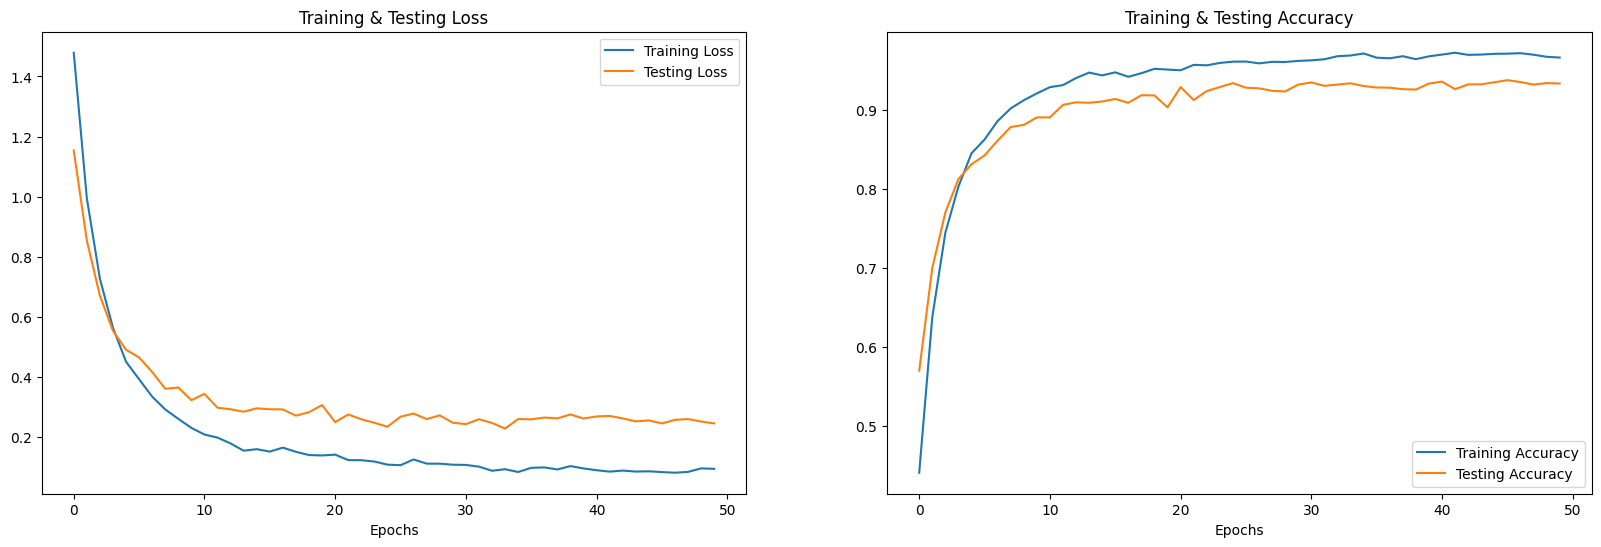

In [52]:
print("Accuracy of our model on test data : " , model.evaluate(X_test_reshaped,Y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [53]:
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=1)
y_pred

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([4, 0, 1, ..., 3, 4, 6], dtype=int64)

In [54]:
y_check = np.argmax(Y_test, axis=1)
y_check

array([5, 0, 1, ..., 3, 4, 6], dtype=int64)

In [55]:
loss,accuracy=model.evaluate(X_test_reshaped,Y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.24568253755569458
Test Accuracy: 0.9337923526763916


In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [57]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[461  12   4   7   7   2   6]
 [  6 515   1   5   5   6   3]
 [  9   6 489  12   1   4   9]
 [  5   6   9 466  10   3  16]
 [  1   4   2   3 595  15   1]
 [  0  16   4   2  11 487   1]
 [  4   3   8  10  10   1 513]]


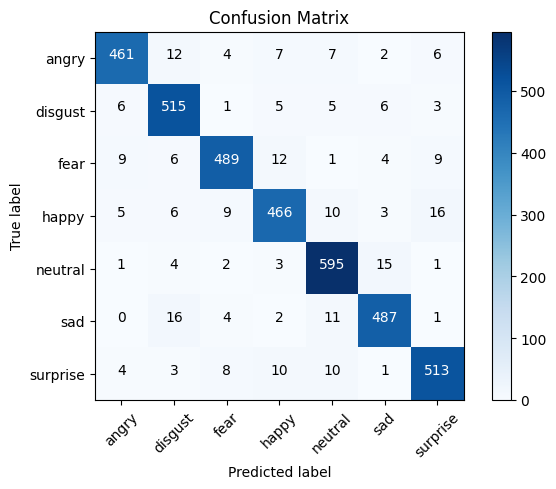

In [58]:
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [59]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     neutral       0.95      0.92      0.94       499
       happy       0.92      0.95      0.93       541
         sad       0.95      0.92      0.93       530
       angry       0.92      0.90      0.91       515
        fear       0.93      0.96      0.94       621
     disgust       0.94      0.93      0.94       521
    surprise       0.93      0.93      0.93       549

    accuracy                           0.93      3776
   macro avg       0.93      0.93      0.93      3776
weighted avg       0.93      0.93      0.93      3776



# Model Performance Analysis

In [60]:
print("Our model achieved an overall accuracy of {:.2f}% on the test data".format(accuracy*100))

Our model achieved an overall accuracy of 93.38% on the test data
